<a href="https://colab.research.google.com/github/robinsonm2021/Data_science/blob/main/Matthew_Robinson_Stats_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

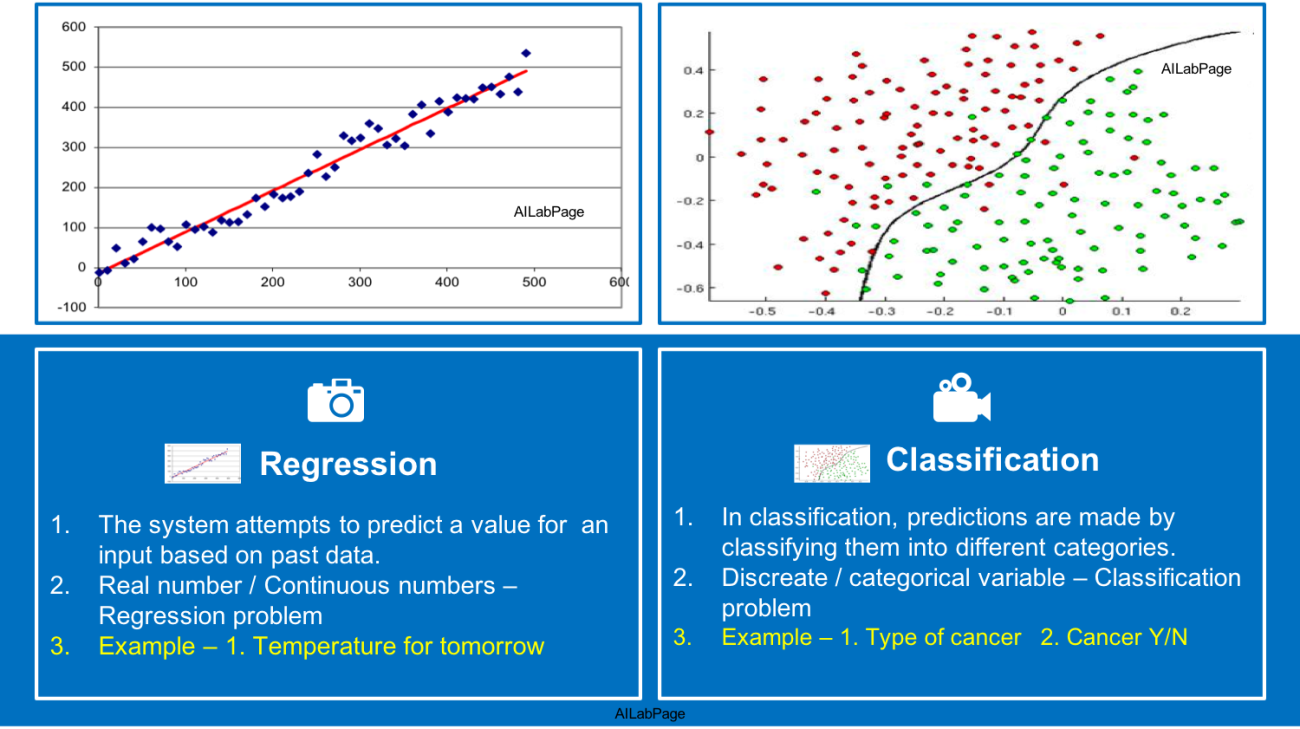

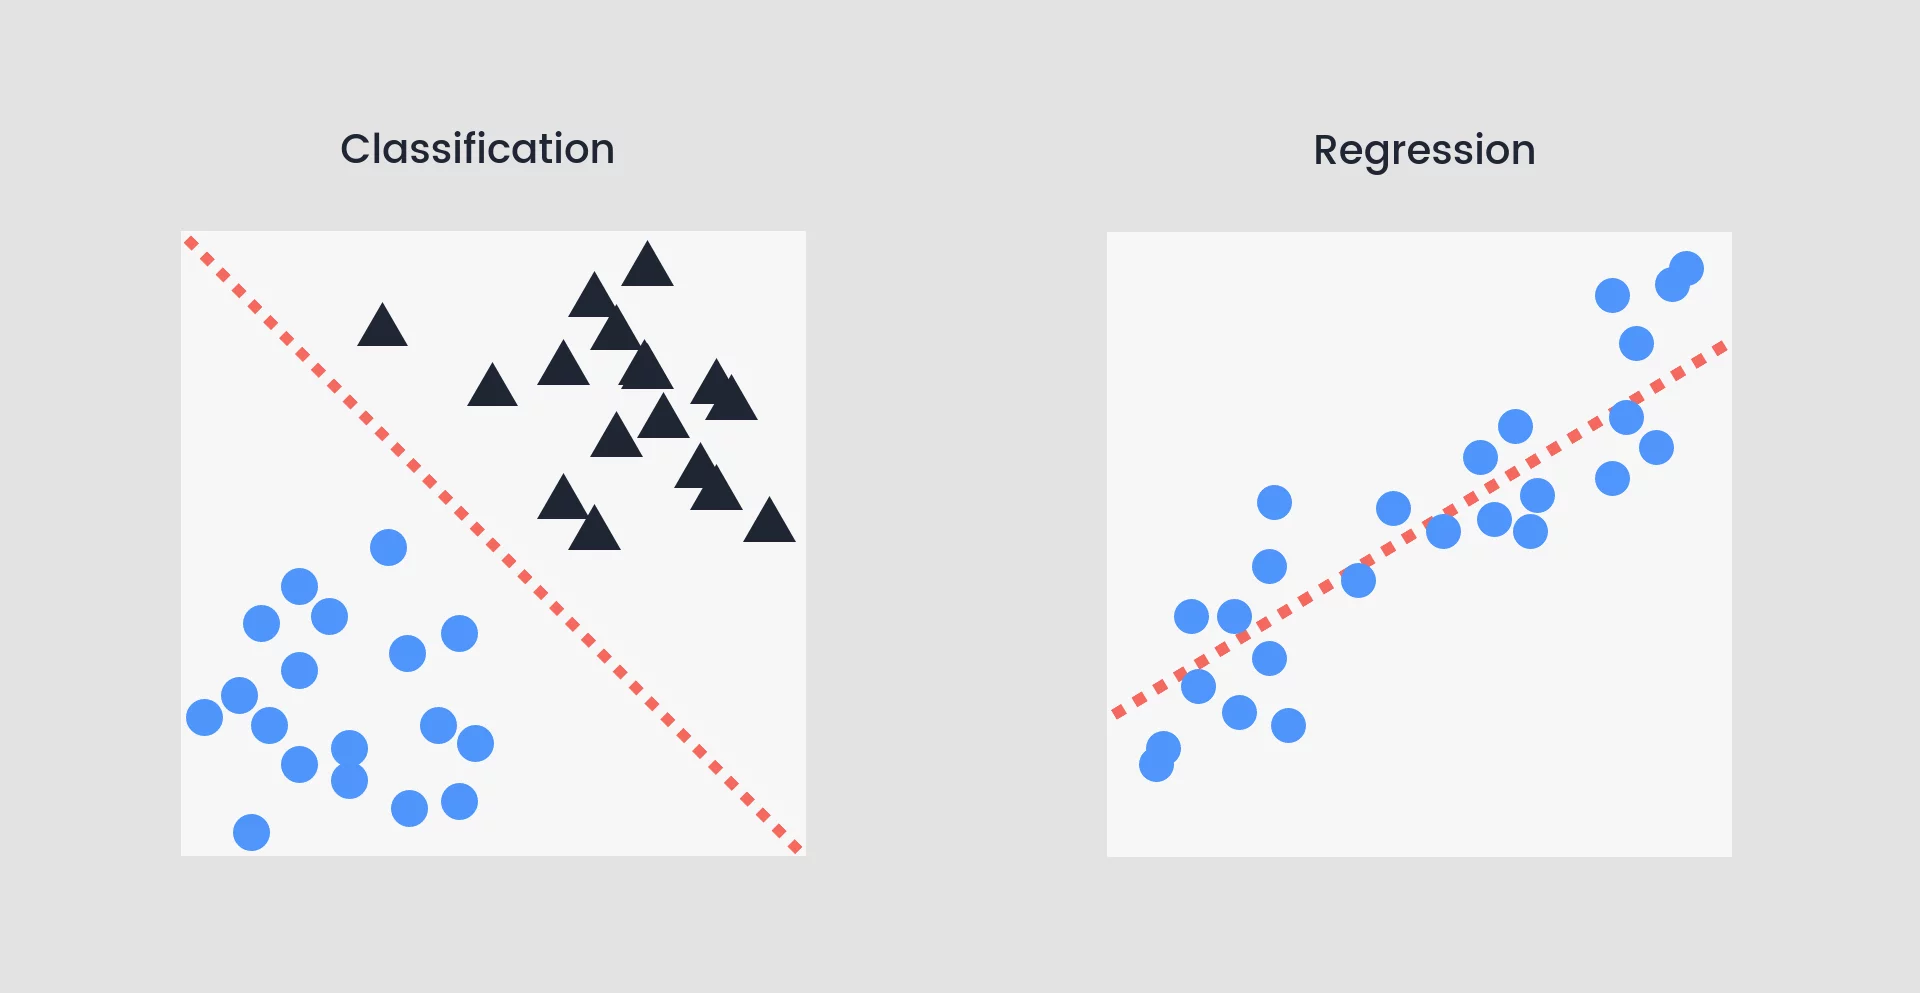

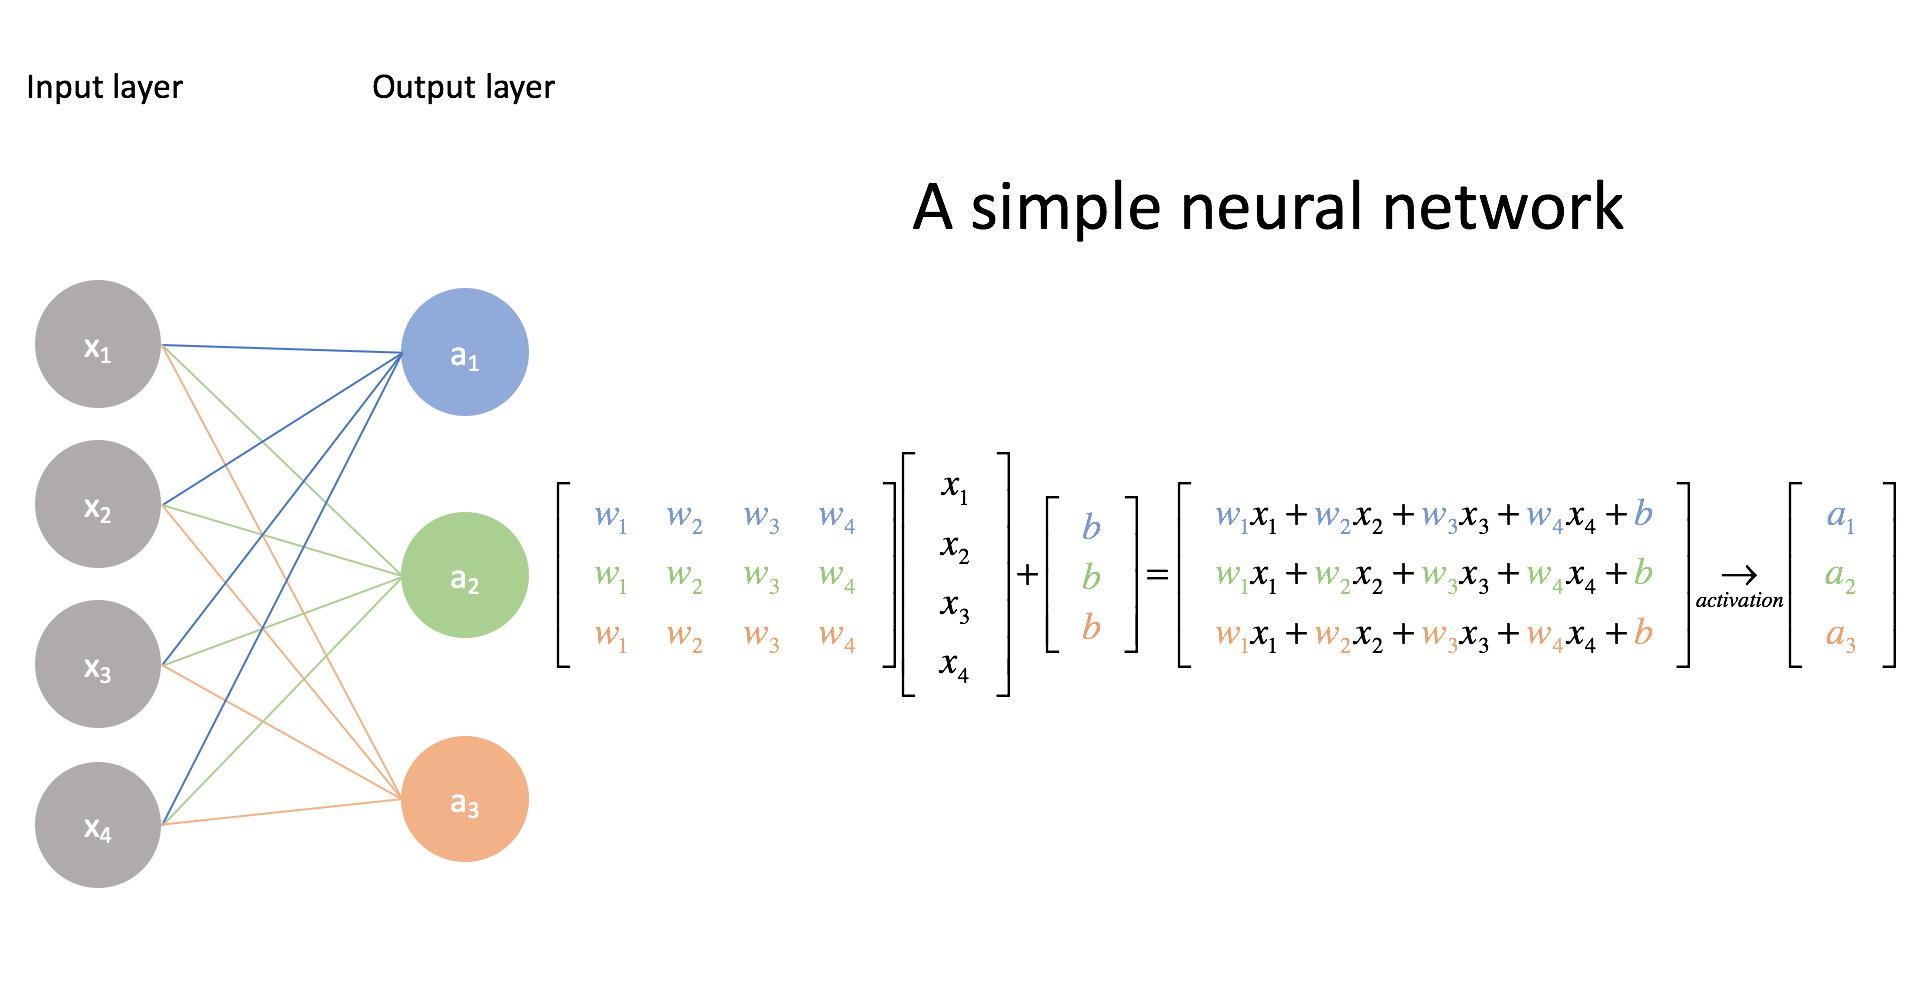

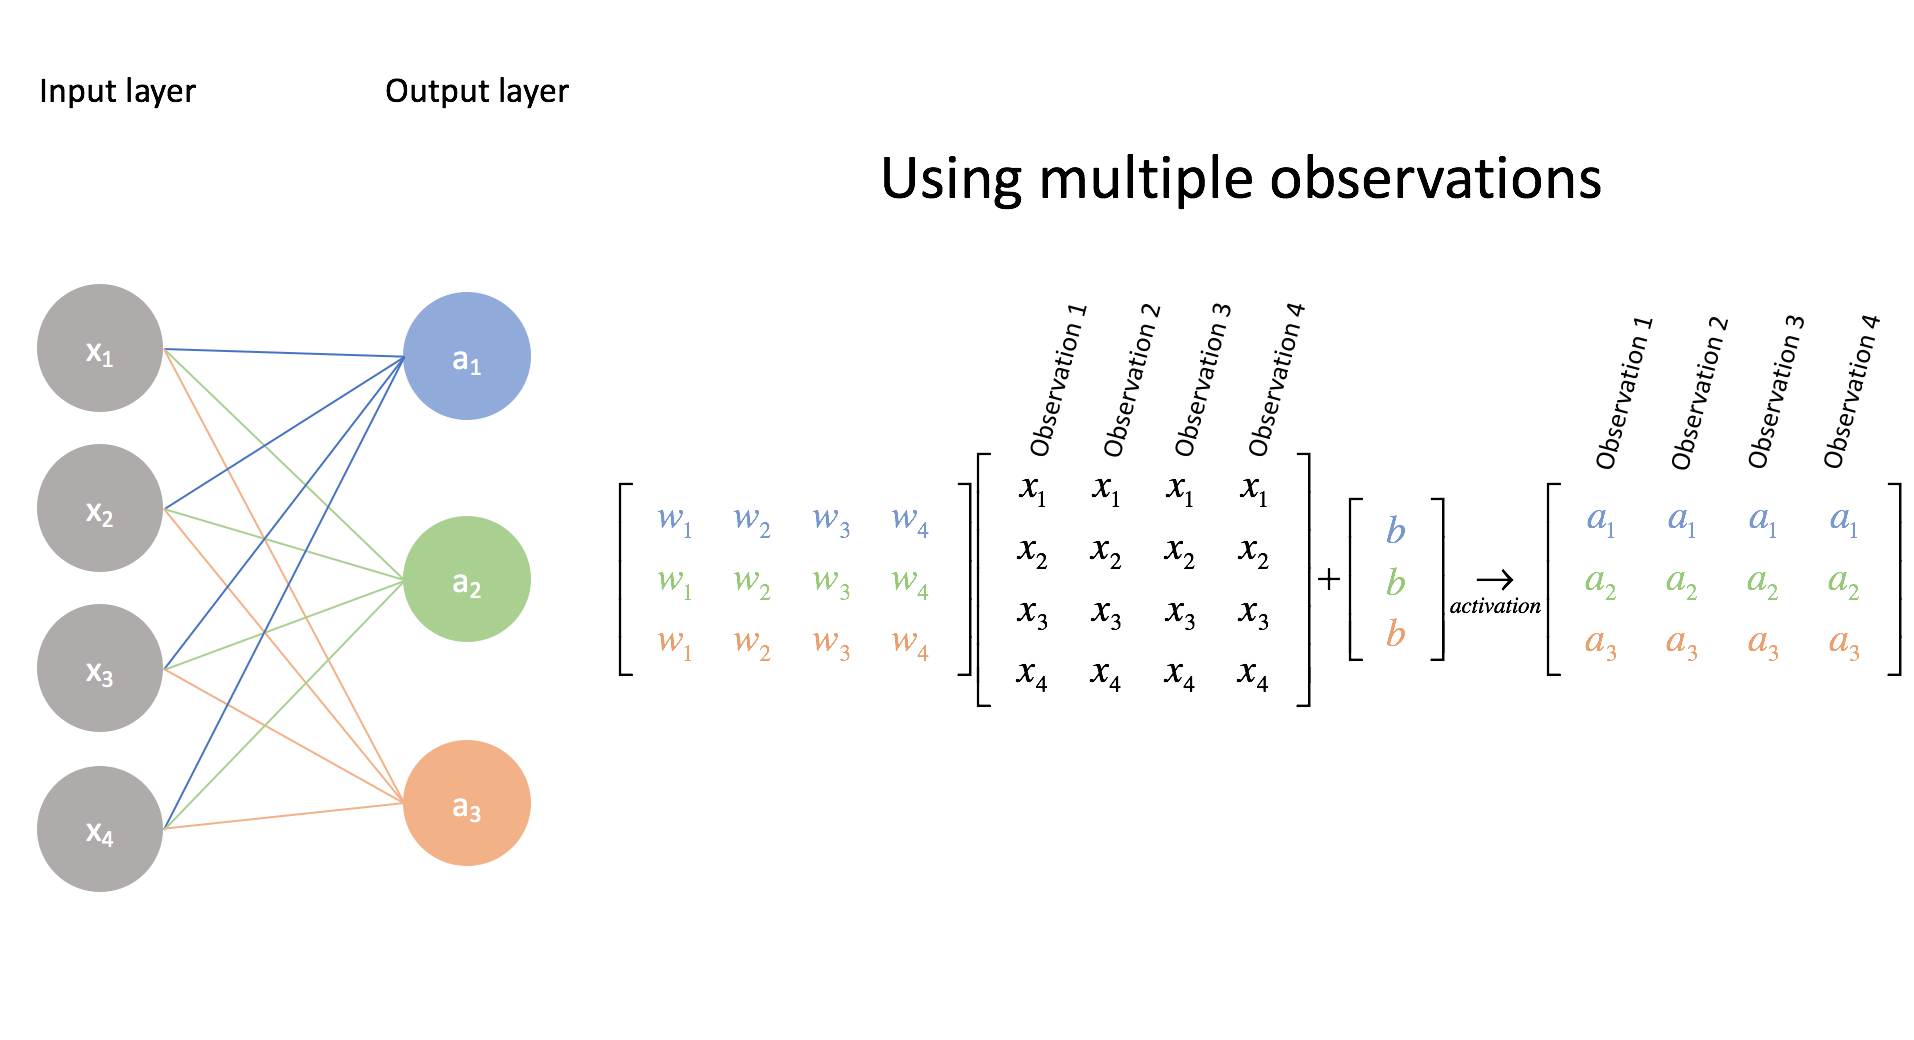

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-hrba7hcl
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-hrba7hcl
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=b3d1f1f6b32c3359cbbbeffafadba4da7c4278d41139d884d5e2441de5c22620
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4dktcn9/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4afe276906e2a562979f42304d4b7e661ccd416ebad49547607bd1bc7b1c1dac
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [2]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [3]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [4]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [5]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [7]:
X.shape #shape of data

(60000, 1, 28, 28)

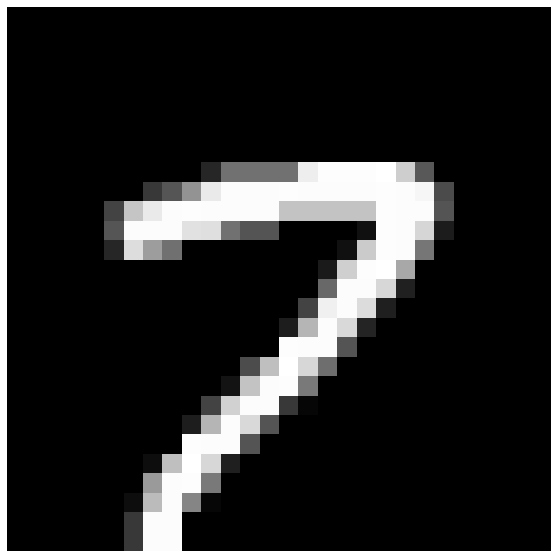

In [8]:
plot(X[123,0,0:28,0:28]) #The plot of the number values detected by the computer

In [9]:
Y[123]

7

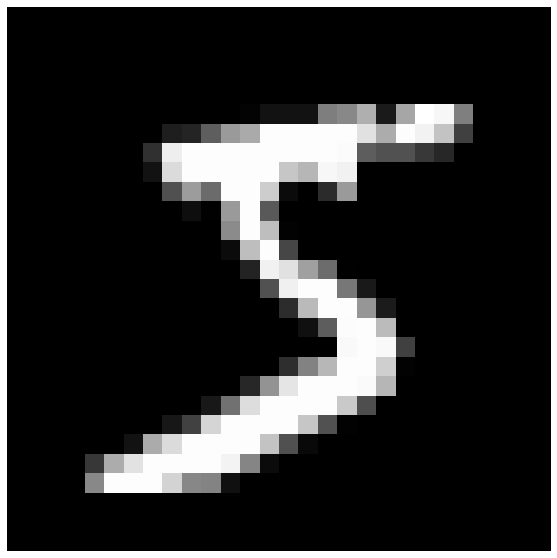

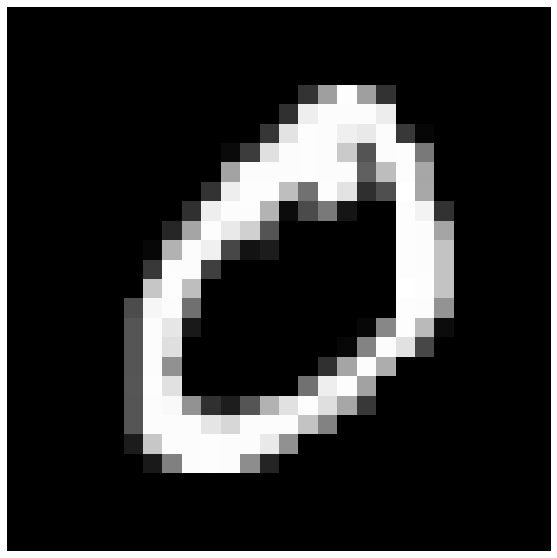

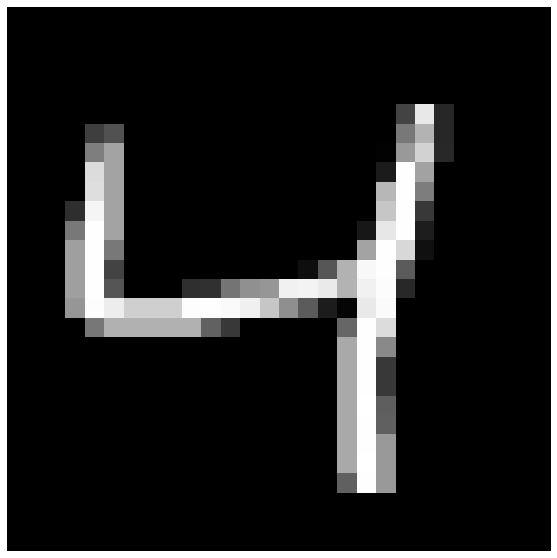

In [10]:
for i in range(3):
    plot(X[i,0,:,:])

In [11]:
Y #the array value of y

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
X[0:25,0,:,:].shape

(25, 28, 28)

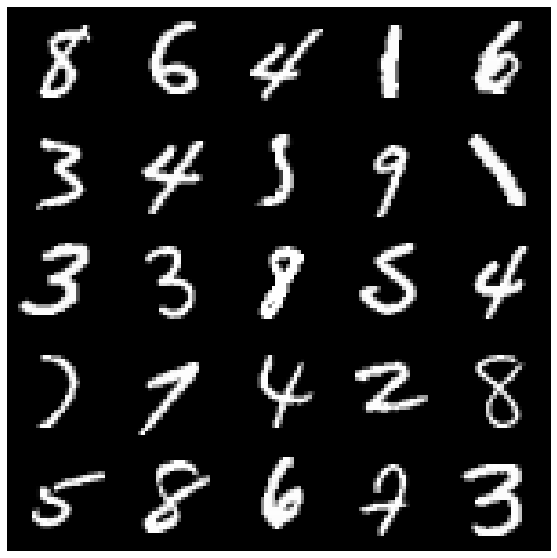

In [13]:
montage_plot(X[125:150,0,:,:]) # a montage of the number detected

In [14]:
X.shape[0]

60000

In [15]:
X_test.shape

(10000, 1, 28, 28)

In [16]:
X.shape[0]

60000

In [17]:
X_test.shape[0]

10000

In [18]:
28*28

784

In [19]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [20]:
X.shape,X_test.shape #the test shape of the image

((60000, 784), (10000, 784))

In [21]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

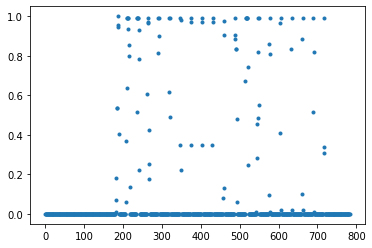

In [22]:
plt.plot(X[100],'.') #the plot of the array

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

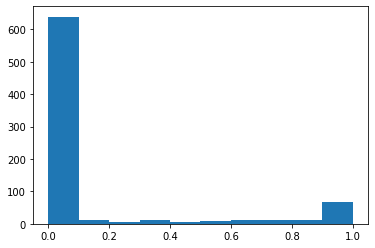

In [23]:
plt.hist(X[0]) #a histogram of the array

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [25]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [26]:
W = torch.load("W.data") # the data is connected to w

In [27]:
W.shape

torch.Size([784, 10])

In [28]:
X.shape

torch.Size([60000, 784])

In [29]:
def plot(x): #used to plot an image
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

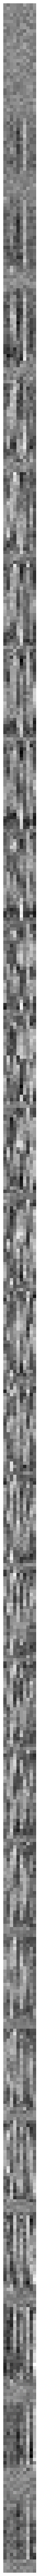

In [30]:
plot(W[0:784,:10]) #plot of a certain piece of the picture

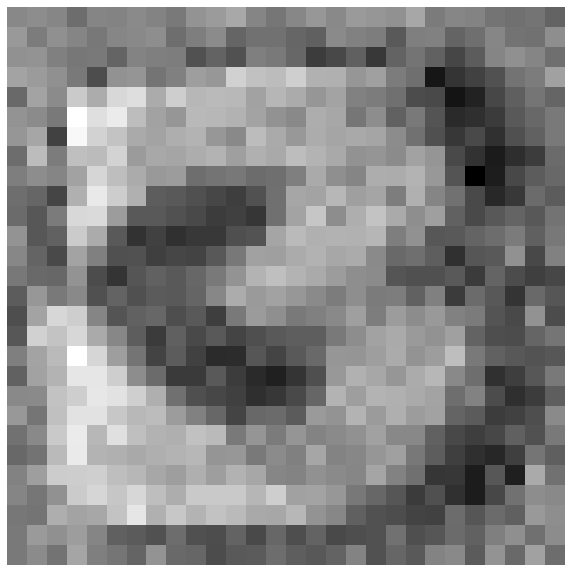

In [31]:
plot(W[:,3].reshape(28,28))

In [32]:
X.shape

torch.Size([60000, 784])

In [33]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [34]:
x,y = get_batch('train')

In [35]:
x.shape

torch.Size([40, 784])

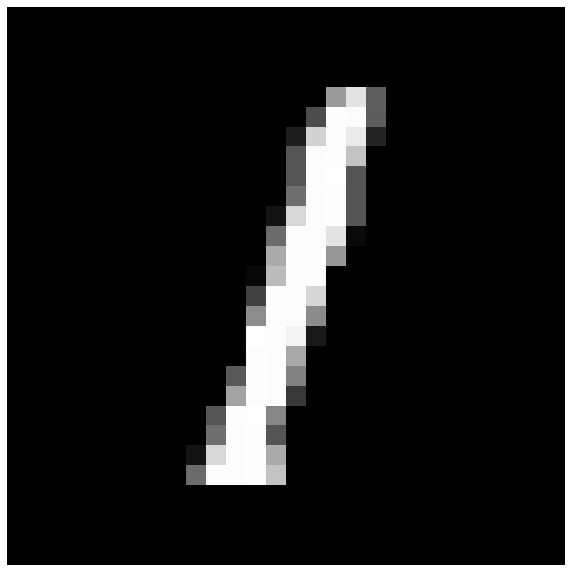

In [36]:
plot(x[0].reshape(28,28))

In [37]:
y

tensor([1., 8., 0., 0., 5., 1., 4., 2., 1., 3., 7., 4., 7., 5., 1., 6., 5., 7.,
        5., 8., 9., 9., 8., 5., 0., 1., 5., 9., 6., 9., 0., 7., 4., 1., 9., 0.,
        2., 9., 8., 0.], device='cuda:0')

In [38]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [39]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [40]:
(x@W).shape

torch.Size([40, 10])

In [41]:
y = x@W

In [42]:
y.shape

torch.Size([40, 10])

In [43]:
y

tensor([[ -2.8985,   9.3745,   2.2265,   1.3261,  -6.7865,  -3.5057,  -0.9455,
          -3.0885,   3.2339,  -1.3903],
        [  0.7257,   0.6379,  -0.4501,   1.6675,  -4.2492,  -0.8666,  -6.5488,
          -6.2412,  10.3168,   0.5151],
        [ 16.7743, -19.5378,  -8.8795,  -4.2892, -13.5438,   6.4797,  -9.6686,
          -4.0694,   5.4285,  -6.4646],
        [  9.2029,  -9.9194,  -6.9232,   5.7437, -10.6199,   5.2957,  -8.8936,
          -6.5179,   3.0107,  -4.7946],
        [ -0.9796, -14.1970, -12.5296,   0.2145,   1.2307,  12.4923,  -4.3091,
           4.4019,   4.8845,   3.9886],
        [ -2.3841,   9.2190,   3.0261,  -0.4032,  -5.1292,  -4.6525,  -0.2468,
          -4.0167,   2.2383,  -3.7169],
        [ -4.9788, -17.4681, -13.3126,  -6.1560,  11.9457,  -0.0342,  -1.8053,
           1.4113,   4.1598,  10.1449],
        [  1.8365,  -3.2127,  11.6823,  -3.5411,  -7.7452,  -4.8098,  -1.5179,
          -8.1684,   4.5250,  -4.5606],
        [ -5.6963,  11.2757,   0.7055,   1.2898,

In [44]:
torch.argmax(y,1)

tensor([1, 8, 0, 0, 5, 1, 4, 2, 1, 8, 7, 4, 7, 5, 1, 6, 5, 7, 3, 8, 9, 9, 8, 5,
        0, 1, 5, 9, 6, 8, 0, 7, 4, 1, 9, 0, 8, 9, 8, 0], device='cuda:0')

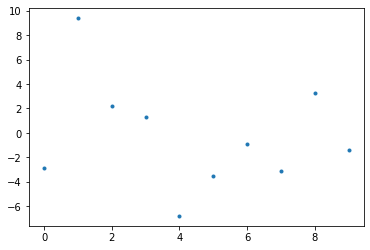

In [45]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [46]:
x@W

tensor([[ -2.8985,   9.3745,   2.2265,   1.3261,  -6.7865,  -3.5057,  -0.9455,
          -3.0885,   3.2339,  -1.3903],
        [  0.7257,   0.6379,  -0.4501,   1.6675,  -4.2492,  -0.8666,  -6.5488,
          -6.2412,  10.3168,   0.5151],
        [ 16.7743, -19.5378,  -8.8795,  -4.2892, -13.5438,   6.4797,  -9.6686,
          -4.0694,   5.4285,  -6.4646],
        [  9.2029,  -9.9194,  -6.9232,   5.7437, -10.6199,   5.2957,  -8.8936,
          -6.5179,   3.0107,  -4.7946],
        [ -0.9796, -14.1970, -12.5296,   0.2145,   1.2307,  12.4923,  -4.3091,
           4.4019,   4.8845,   3.9886],
        [ -2.3841,   9.2190,   3.0261,  -0.4032,  -5.1292,  -4.6525,  -0.2468,
          -4.0167,   2.2383,  -3.7169],
        [ -4.9788, -17.4681, -13.3126,  -6.1560,  11.9457,  -0.0342,  -1.8053,
           1.4113,   4.1598,  10.1449],
        [  1.8365,  -3.2127,  11.6823,  -3.5411,  -7.7452,  -4.8098,  -1.5179,
          -8.1684,   4.5250,  -4.5606],
        [ -5.6963,  11.2757,   0.7055,   1.2898,

In [47]:
y2 = x@W 

In [48]:
y2.shape

torch.Size([40, 10])

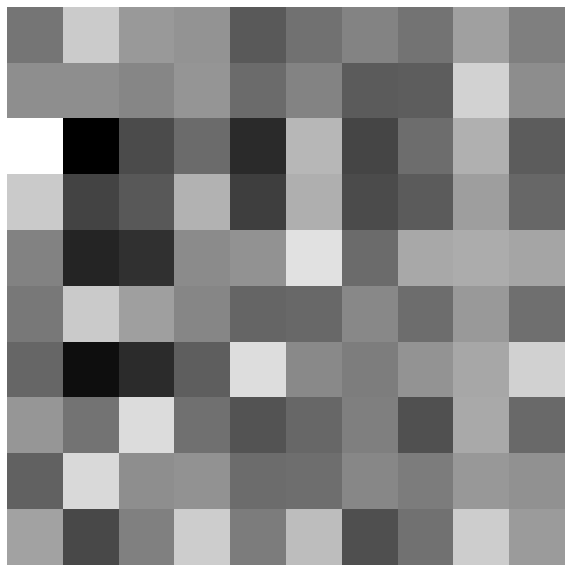

In [49]:
plot(y2[0:10,:])

In [54]:
y

tensor([[ -2.8985,   9.3745,   2.2265,   1.3261,  -6.7865,  -3.5057,  -0.9455,
          -3.0885,   3.2339,  -1.3903],
        [  0.7257,   0.6379,  -0.4501,   1.6675,  -4.2492,  -0.8666,  -6.5488,
          -6.2412,  10.3168,   0.5151],
        [ 16.7743, -19.5378,  -8.8795,  -4.2892, -13.5438,   6.4797,  -9.6686,
          -4.0694,   5.4285,  -6.4646],
        [  9.2029,  -9.9194,  -6.9232,   5.7437, -10.6199,   5.2957,  -8.8936,
          -6.5179,   3.0107,  -4.7946],
        [ -0.9796, -14.1970, -12.5296,   0.2145,   1.2307,  12.4923,  -4.3091,
           4.4019,   4.8845,   3.9886],
        [ -2.3841,   9.2190,   3.0261,  -0.4032,  -5.1292,  -4.6525,  -0.2468,
          -4.0167,   2.2383,  -3.7169],
        [ -4.9788, -17.4681, -13.3126,  -6.1560,  11.9457,  -0.0342,  -1.8053,
           1.4113,   4.1598,  10.1449],
        [  1.8365,  -3.2127,  11.6823,  -3.5411,  -7.7452,  -4.8098,  -1.5179,
          -8.1684,   4.5250,  -4.5606],
        [ -5.6963,  11.2757,   0.7055,   1.2898,

In [55]:
one_hot(y)

ValueError: ignored

In [53]:
plot(one_hot(y))

ValueError: ignored

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

In [ ]:
torch.argmax(y2,1)

In [ ]:
b

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

In [ ]:
X.shape

In [ ]:
%%timeit
X[20000]@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W

In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

#Generator

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
plt.hist(x.flatten().cpu().numpy())

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
def Encoder(x,w):
    return x@w[0]

In [ ]:
def Decoder(x,w):
    return x@(w[0].T)

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [ ]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

In [ ]:
# batch_size = 16

In [ ]:
x,y = get_batch('test')

In [ ]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x2 = Autoencoder(x,w)

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
w[0].shape

In [ ]:
wp = w[0].T 

In [ ]:
wp = wp.reshape(-1,28,28)

In [ ]:
wp.shape

In [ ]:
montage_plot(wp.detach().cpu().numpy())

In [ ]:
x.shape

In [ ]:
x = x[0:1]

In [ ]:
y = Encoder(x,w)

In [ ]:
y.shape

In [ ]:
plt.plot(y[0].cpu().detach().numpy())

In [ ]:
noise = 0.2*np.random.randn(78)

In [ ]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [ ]:
noise

In [ ]:
noise = GPU(noise)

In [ ]:
x2 = Decoder(y+noise,w)

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [ ]:
x2 = Decoder(y,w)

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())